In [1]:
import numpy as np
import matplotlib.pyplot as plt

import moduloPaper as mod
import plt_conf as conf  # modulo de configuración de gráfico

from scipy.interpolate import interp1d 
from scipy.optimize import fsolve
from matplotlib import colormaps, colors, cm

In [2]:
conf.general()  # cargando configuración general

In [11]:
# Loading data
# Tringles

FullTriangles = [np.loadtxt('data/dataTriang%d.dat'%i, unpack=True) for i in range(1, 7)]
phi0F, x0F, y0F, phi1F, x1F, y1F, phi2F, x2F, y2F = np.loadtxt('data/dataTriangFond.dat', unpack=True)

# angles
phi, ang = np.loadtxt('data/dataAngMathe.dat', unpack=True)  # numerical data
phiS, angS = np.loadtxt('data/dataAngSerMathe.dat', unpack=True)  # data using the power expantion

In [4]:
# Util
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

def chop_cmap_frac(cmap: LinearSegmentedColormap, frac: float) -> LinearSegmentedColormap:
    """Chops off the beginning `frac` fraction of a colormap."""
    cmap_as_array = cmap(np.arange(256))
    cmap_as_array = cmap_as_array[int(frac * len(cmap_as_array)):]
    return LinearSegmentedColormap.from_list(cmap.name + f"_frac{frac}", cmap_as_array)


def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

/var/folders/mz/hm7z81f16nj6xj1h62y1k9zm0000gn/T/ipykernel_74643/3052883702.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(-5e-03, 0.14)


Text(900.0, 0.011, '$\\phi_{\\mathrm{Min}}=0.4$rad')

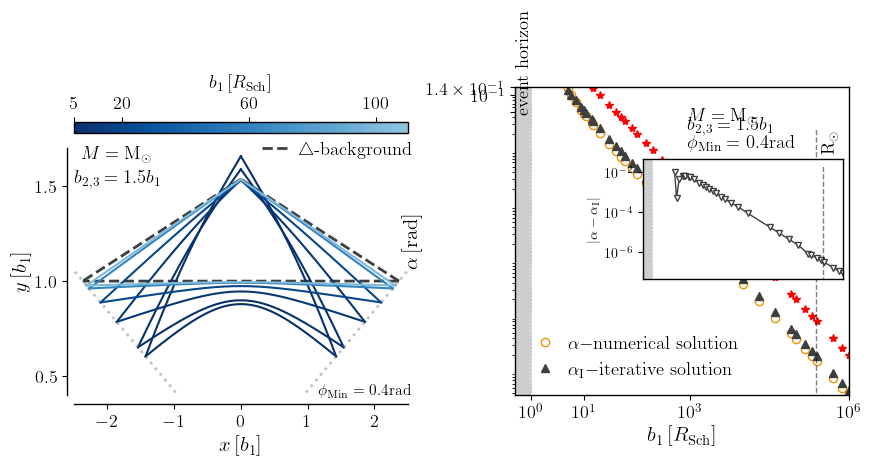

In [16]:
col = ['#3d4040', '#1151d1', '#f24f0a', '#fabc02', '#046e02', '#6e0206']
bVal = [5, 5.8, 10, 20, 60, 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.32))

# Fondo
ax[0].plot(x0F, y0F, ls='--', c='#3d4040')
ax[0].plot(x1F, y1F, ls='--', c='#3d4040') 
ax[0].plot(x2F, y2F, ls='--', c='#3d4040')
ax[0].plot([], [], ls='--', c='#3d4040', label=r'$\triangle$-background')

# defining radii
linf = lambda x, m, n: m*x+n
fitlin = lambda n, x, y, m: y-(m*x+n)
m = (y0F[0]-0)/(x0F[0]-0)
nval = fsolve(fitlin, x0=0.5, args=(x0F[0], y0F[0], m))

# define color map
cmap = colormaps.get_cmap('Blues')
cmap = chop_cmap_frac(cmap, 0.4)
cmap_r = reverse_colourmap(cmap)
# need to normalize because color maps are defined in [0, 1]
cMin, cMax = min(bVal), max(bVal)+10
norm = colors.Normalize(cMin, cMax)

for i in range(6):
    _, x0, y0, _, x1, y1, _, x2, y2 = FullTriangles[i]
    col = norm(bVal[i])
    ax[0].plot(x0, y0, ls='-', c=cmap_r(col), lw=1.5)
    ax[0].plot(x1, y1, ls='-', c=cmap_r(col), lw=1.5) 
    ax[0].plot(x2, y2, ls='-', c=cmap_r(col), lw=1.5)

# plot colorbar
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap_r),
             ax=ax[0], aspect=30, location='top')

cb.set_ticks([bVal[0], bVal[3], bVal[4], bVal[-1]])
#cb.set_label(r'$b_0\,[R_s]$', fontsize='small')
cb.ax.set_title(r'$b_1\,[R_{\mathrm{Sch}}]$', fontsize='small')



# lines
xvals = np.linspace(0, 3)
ax[0].plot(xvals, linf(xvals, m, nval), ls=':', c='#838991', alpha=0.5)
ax[0].plot(-xvals, linf(-xvals, -m, -nval), ls=':', c='#838991', alpha=0.5)

# text
ax[0].text(x=-2.4, y=1.65, s=r'$M=\mathrm{M}_\odot$',
           fontsize='small', rotation='horizontal')
ax[0].text(x=-2.5, y=1.52, s=r'$b_{2,3}=1.5b_1$',
           fontsize='small', rotation='horizontal')
ax[0].text(1.15, 0.4, r'$\phi_{\mathrm{Min}}=0.4$rad', fontsize=11)

ax[0].set_yticks([0.5, 1, 1.5])
# Axes limits
ax[0].set_ylim(0.4, 1.7)
ax[0].set_xlim(-2.5, 2.5)

# Axes Label
ax[0].set_ylabel(r'$y\,[b_1]$')
ax[0].set_xlabel(r'$x\,[b_1]$')

# Editing axes
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].spines['left'].set_position(('data', -2.6))
ax[0].spines['bottom'].set_position(('data', 0.35))


#
ax[0].legend(loc=(0.54, 0.93),frameon=False, handletextpad=0.5, fontsize='small')
############

##########
#############
Msun = 1.9885e30  # kg 
G = 6.674e-11  # m^3/(kg s^2)
c = 299792458  # m/s
Rsun = 6.96e08  # m

angf = lambda M, G, c, b: 4*G*M/(c**2*b)
fac = 206265
##############
M=Msun
b0 = phi*2*G*M/c**2
yvald = angf(M, G, c, b0)

#ax[1].plot(phi, yvald, 'r*')
ax[1].plot(phi, ang, marker='o', mfc='white', ls='', c='#eb9205', label=r'$\alpha-$numerical solution')
ax[1].plot(phiS, angS, marker='^', ls='', c='#3d4040', label=r'$\alpha_{\mathrm{I}}-$iterative solution')

ax[1].set_xscale('log')
#ax[1].set_yscale('log')

left, bottom, width, height = [0.694, 0.4, 0.2, 0.3]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax1.plot(phi, np.abs(ang-angS), marker='v', c='#3d4040', mfc='white',
         markersize=5, ls='-', lw=1)

ax1.axvspan(xmin=0, xmax=1, ymin=-0.1, ymax=1, color='#9c9fa1', ls=':', alpha=0.5)
ax1.vlines(x=235672, ymin=-0.001, ymax=0.025, ls='--', lw=1, color='k',alpha=0.5)
ax1.yaxis.set_tick_params(labelsize=10)
ax1.set_xlim(0.5, 1e06)
ax1.set_ylabel(r'$|\alpha-\alpha_{\mathrm{I}}|$%', fontsize=10)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([])

ax[1].set_yticks([0, 0.05, 0.10, 0.14])
ax[1].set_xticks([1, 10, 1000, 1000000])

ax[1].set_ylabel(r'$\alpha\, [\mathrm{rad}]$')
ax[1].set_xlabel(r'$b_1\,[R_\mathrm{Sch}]$')



# Axes limits
ax[1].set_ylim(-5e-03, 0.14)
ax[1].set_xlim(0.5, 1e06)

ax[1].vlines(x=235672, ymin=-0.001, ymax=0.025, ls='--', lw=1, color='k',alpha=0.5)
ax[1].text(x=3e05, y=0.01, s=r'$\mathrm{R}_\odot$', fontsize='small', rotation='vertical')

ax[1].axvspan(xmin=0, xmax=1, ymin=-0.1, ymax=1, color='#9c9fa1', ls=':', alpha=0.5)
ax[1].text(x=0.52, y=0.05, s='event horizon', rotation='vertical', fontsize='small')

#ax[1].axvspan(xmin=1, xmax=1.5, ymin=-0.1, ymax=1, color='#9c9fa1', ls=':', alpha=0.5)

ax[1].legend(loc='best',frameon=False, handletextpad=0.5, fontsize='small')


ax[1].text(x=9e02, y=0.035, s=r'$M=\mathrm{M}_\odot$',
           fontsize='small', rotation='horizontal')
ax[1].text(x=9e02, y=0.023, s=r'$b_{2,3}=1.5b_1$',
           fontsize='small', rotation='horizontal')
ax[1].text(x=9e02, y=0.011, s=r'$\phi_{\mathrm{Min}}=0.4$rad', fontsize='small')



In [14]:
fig.savefig('Sch_Ds.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [27]:
###

In [15]:
# Loading data
# Tringles b2

FullTriangles = [np.loadtxt('data/dataTriang%db2.dat'%i, unpack=True) for i in range(1, 6)]
FullTrianglesFondo = [np.loadtxt('data/dataTriangFond%db2.dat'%i, unpack=True) for i in range(1, 6)]

#b2 Pos
b2Posit1 = np.loadtxt('data/datab2Posit.dat', unpack=True)

# angles
phi1, ang1 = np.loadtxt('data/dataAngMatheb2.dat', unpack=True)  # numerical data
phiS1, angS1 = np.loadtxt('data/dataAngSerMatheb2.dat', unpack=True)  # data using the power expantion

# cas2
#FullTriangles = [np.loadtxt('data/dataTriang%db2c2.dat'%i, unpack=True) for i in range(1, 4)]
#FullTrianglesFondo = [np.loadtxt('data/dataTriangFond%db2c2.dat'%i, unpack=True) for i in range(1, 4)]

#b2 Pos
b2Posit2 = np.loadtxt('data/datab2Positc2.dat', unpack=True)

# angles
phi2, ang2 = np.loadtxt('data/dataAngMatheb2c2.dat', unpack=True)  # numerical data
phiS2, angS2 = np.loadtxt('data/dataAngSerMatheb2c2.dat', unpack=True)  # data using the power expantion

# cas3
# angles
phi3, ang3 = np.loadtxt('data/dataAngMatheb2c3.dat', unpack=True)  # numerical data
phiS3, angS3 = np.loadtxt('data/dataAngSerMatheb2c3.dat', unpack=True)  # data using the power expantion

In [16]:
# Loading data
# Tringles b2

FullTriangles08 = [np.loadtxt('data/dataTriang%db2_0_008.dat'%i, unpack=True) for i in range(1, 6)]
FullTrianglesFondo08 = [np.loadtxt('data/dataTriangFond%db2_0_008.dat'%i, unpack=True) for i in range(1, 6)]

#b2 Pos
b2Posit1_08 = np.loadtxt('data/datab2Posit_0_008.dat', unpack=True)

# angles
phi1_08, ang1_08 = np.loadtxt('data/dataAngMatheb2_0_008.dat', unpack=True)  # numerical data
phiS1_08, angS1_08 = np.loadtxt('data/dataAngSerMatheb2_0_008.dat', unpack=True)  # data using the power expantion

# cas2
#FullTriangles = [np.loadtxt('data/dataTriang%db2c2.dat'%i, unpack=True) for i in range(1, 4)]
#FullTrianglesFondo = [np.loadtxt('data/dataTriangFond%db2c2.dat'%i, unpack=True) for i in range(1, 4)]

#b2 Pos
b2Posit2_04 = np.loadtxt('data/datab2Posit_0_04.dat', unpack=True)

# angles
phi_04, ang_04 = np.loadtxt('data/dataAngMatheb2_0_04.dat', unpack=True)  # numerical data
phiS_04, angS_04 = np.loadtxt('data/dataAngSerMatheb2_0_04.dat', unpack=True)  # data using the power expantion

In [17]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

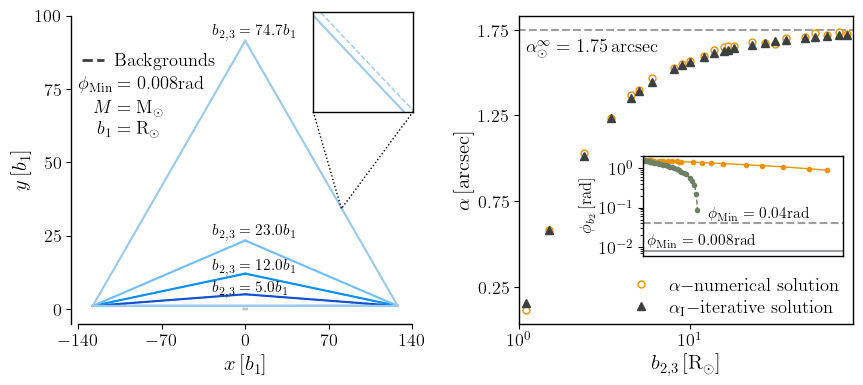

In [44]:
#col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#0c9cf5']
col = ['#0602f5', '#1151d1','#0590fa', '#72bff7', '#9dcaeb', '#f24f0a', '#fabc02', '#046e02', '#3d4040', '#6e0206']
b2Val = [1.1, 5., 12, 23, 74.65]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.32))


# Fondo
for i in range(1,5):
    _, x0F, y0F, _, x1F, y1F, _, x2F, y2F = FullTrianglesFondo08[i]
    ax[0].plot(x0F, y0F, ls='--', lw=1.0, c=col[i])  # c=cmap_r(col),'#3d4040'
    ax[0].plot(x1F, y1F, ls='--', lw=1.0, c=col[i]) 
    ax[0].plot(x2F, y2F, ls='--', lw=1.0, c=col[i])
    
ax[0].plot([], [], ls='--', c='#3d4040', label=r'Backgrounds') #$\triangle$-

# defining radii
linf = lambda x, m, n: m*x+n
fitlin = lambda n, x, y, m: y-(m*x+n)
m = (y0F[0]-0)/(x0F[0]-0)
nval = fsolve(fitlin, x0=0.5, args=(x0F[0], y0F[0], m))

# lines
xvals = np.linspace(0, 3)
ax[0].plot(xvals, linf(xvals, m, nval), ls=':', c='#838991', alpha=0.5)
ax[0].plot(-xvals, linf(-xvals, -m, -nval), ls=':', c='#838991', alpha=0.5)

for i in range(1,5):
    _, x0, y0, _, x1, y1, _, x2, y2 = FullTriangles08[i]
    ax[0].plot(x0, y0, ls='-', c=col[i], lw=1.5)  # 
    ax[0].plot(x1, y1, ls='-', c=col[i], lw=1.5) 
    ax[0].plot(x2, y2, ls='-', c=col[i], lw=1.5)


# Axes limits

ax[0].set_ylim(-5, 95)
ax[0].set_xlim(-140, 140)

# Axes Label
ax[0].set_ylabel(r'$y\,[b_1]$')
ax[0].set_xlabel(r'$x\,[b_1]$') 

# Editing axes
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].spines['left'].set_position(('data', -146))
ax[0].spines['bottom'].set_position(('data', -5))

ax[0].set_xticks([-140, -70, 0, 70, 140]);
ax[0].set_yticks([0, 25, 50, 75, 100]);


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.36, 0.64, 0.1, 0.25]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax1.plot(x1F, y1F, ls='--', lw=1.0, c=col[i]) 
ax1.plot(x1, y1, ls='-', c=col[i], lw=1.5) 

ax1.set_xlim(80.5, 80.8)
ax1.set_ylim(34.3, 34.5)
mark_inset(ax[0], ax1, loc1=3, loc2=4, fc="none", ec="0.", ls=':', color='black')

#
ax1.set_xticks([]);
ax1.set_yticks([]);

ax[0].text(x=-28, y=5.5, s=r'$b_{2,3}=%3.1f b_1$'%b2Val[1], rotation='horizontal', fontsize=11)
ax[0].text(x=-28, y=13, s=r'$b_{2,3}=%3.1f b_1$'%b2Val[2], rotation='horizontal', fontsize=11)
ax[0].text(x=-28, y=25, s=r'$b_{2,3}=%3.1f b_1$'%b2Val[3], rotation='horizontal', fontsize=11)
ax[0].text(x=-28, y=93, s=r'$b_{2,3}=%3.1f b_1$'%b2Val[4], rotation='horizontal', fontsize=11)
#ax[0].text(x=-0.54, y=5.74, s=r'$b_{2,3}=%3.2f b_1$'%b2Val[4], rotation='horizontal', fontsize=11)



##########
#############
Msun = 1.9885e30  # kg 
G = 6.674e-11  # m^3/(kg s^2)
c = 299792458  # m/s
Rsun = 6.96e08  # m

ang = lambda M, G, c, b: 4*G*M/(c**2*b)
fac = 206265
##############
b0 = Rsun
yval = ang(Msun, G, c, b0)

ax[1].hlines(y=yval*fac, xmin=0, xmax=200, ls='--', lw=1.5, color='#9c9fa1')
ax[1].plot(phi1_08, ang1_08*fac, marker='o', markersize=5, mfc='white',
           ls='', c='#eb9205', label=r'$\alpha-$numerical solution')

ax[1].plot(phiS1_08, angS1_08*fac, marker='^', ls='', c='#3d4040', 
           label=r'$\alpha_{\mathrm{I}}-$iterative solution')



#ax[1].plot(phi2, ang2*fac, marker='*')
#ax[1].plot(phiS2, angS2*fac, marker='v')

#ax[1].plot(phi3, ang3*fac, marker='p')
#ax[1].plot(phiS3, angS3*fac, marker='o')

ax[1].set_xlim(1.0, 90)
ax[1].set_xlabel(r'$b_{2,3}\,[\mathrm{R}_\odot]$')
ax[1].set_ylabel(r'$\alpha\, [\mathrm{arcsec}]$')

temp = yval*fac
ax[1].text(1.1, temp-0.13, r'$\alpha^{\infty}_{\odot}=%3.2f\, \mathrm{arcsec}$'%temp, fontsize='small' )

ax[1].set_xticks([1, 10, 50, 90]);
ax[1].set_yticks([0.25, 0.75, 1.25, 1.75]);

#ax[1].text(x=1.1, y=0.65, s=r'$M=\mathrm{M}_\odot$',
#           fontsize='small', rotation='horizontal')
#ax[1].text(x=1.12, y=0.52, s=r'$b_{1}=\mathrm{R}_\odot$',
#           fontsize='small', rotation='horizontal')


ax[1].legend(loc=(0.3, 0), frameon=False, fontsize='small', labelspacing=0.3)

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.69, 0.28, 0.2, 0.25]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

ax2.plot(b2Posit1_08[0], b2Posit1_08[1], ls='-', marker='.', lw=1.0, c='#eb9205')
ax2.plot(b2Posit2_04[0], b2Posit2_04[1], ls='--', marker='.', lw=1.0, c='#6e8063')


ax2.hlines(y=0.008, xmin=1, xmax=100, ls='-', lw=1.5, color='#9c9fa1')
ax2.hlines(y=0.04, xmin=1, xmax=100, ls='--', lw=1.5, color='#9c9fa1')
ax2.tick_params('x', labelbottom=False)
ax2.set_xticks([]);
#ax2.set_ylim(-0.1, 1.65)

ax2.set_xlim(1.0, 90)
ax2.set_ylabel(r'$\phi_{b_{2}}\,[\mathrm{rad}]$', fontsize=12)

ax2.text(x=2.5, y=0.012, s=r'$\phi_{\mathrm{Min}}=0.008\mathrm{rad}$',
           fontsize=11, rotation='horizontal')
ax2.text(x=30, y=0.055, s=r'$\phi_{\mathrm{Min}}=0.04\mathrm{rad}$',
           fontsize=11, rotation='horizontal')

ax2.set_yscale('log')
#ax2.legend(loc=(0.35, 0.7), frameon=False, fontsize='small')


ax[0].text(x=-140, y=75, s=r'$\phi_{\mathrm{Min}}=0.008$rad', fontsize='small')
ax[0].text(x=-128, y=67, s=r'$M=\mathrm{M}_\odot$', fontsize='small', rotation='horizontal')
ax[0].text(x=-124, y=60, s=r'$b_{1}=\mathrm{R}_\odot$', fontsize='small', rotation='horizontal')

ax[0].legend(loc=(-0.01, 0.8),frameon=False, handletextpad=0.5,
             handlelength=1.2, fontsize='small')

ax[1].set_xscale('log')

In [45]:
fig.savefig('Sch_Ds2.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [ ]:
 ang1

(-0.1, 4.0)

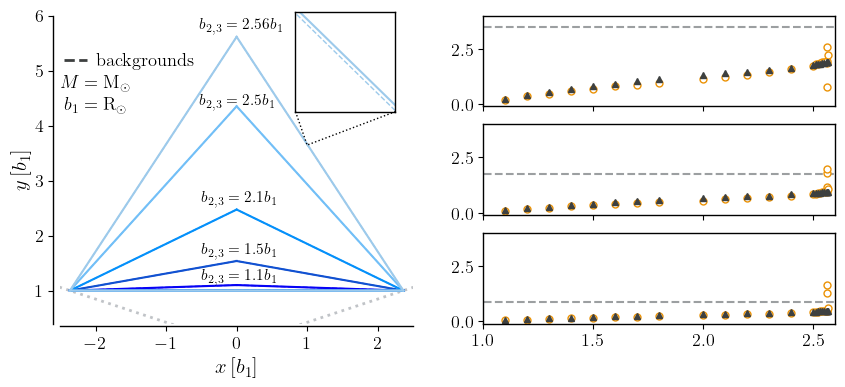

In [13]:
col = ['#0602f5', '#1151d1','#0590fa', '#72bff7', '#9dcaeb', '#f24f0a', '#fabc02', '#046e02', '#3d4040', '#6e0206']
b2Val = [1.1, 1.5, 2.1, 2.51, 2.562]

fig = plt.figure(figsize=(10, 4.))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(324, sharex=ax2)
ax4 = fig.add_subplot(326, sharex=ax2)

#####
# Fondo
for i in range(5):
    _, x0F, y0F, _, x1F, y1F, _, x2F, y2F = FullTrianglesFondo[i]
    ax1.plot(x0F, y0F, ls='--', lw=1.0, c=col[i])  # c=cmap_r(col),'#3d4040'
    ax1.plot(x1F, y1F, ls='--', lw=1.0, c=col[i]) 
    ax1.plot(x2F, y2F, ls='--', lw=1.0, c=col[i])
    
ax1.plot([], [], ls='--', c='#3d4040', label=r'backgrounds') #$\triangle$

# defining radii
linf = lambda x, m, n: m*x+n
fitlin = lambda n, x, y, m: y-(m*x+n)
m = (y0F[0]-0)/(x0F[0]-0)
nval = fsolve(fitlin, x0=0.5, args=(x0F[0], y0F[0], m))

# lines
xvals = np.linspace(0, 3)
ax1.plot(xvals, linf(xvals, m, nval), ls=':', c='#838991', alpha=0.5)
ax1.plot(-xvals, linf(-xvals, -m, -nval), ls=':', c='#838991', alpha=0.5)

for i in range(5):
    _, x0, y0, _, x1, y1, _, x2, y2 = FullTriangles[i]
    ax1.plot(x0, y0, ls='-', c=col[i], lw=1.5)  # 
    ax1.plot(x1, y1, ls='-', c=col[i], lw=1.5) 
    ax1.plot(x2, y2, ls='-', c=col[i], lw=1.5)


# Axes limits
ax1.set_ylim(0.4, 6)
ax1.set_xlim(-2.5, 2.5)

# Axes Label
ax1.set_ylabel(r'$y\,[b_1]$')
ax1.set_xlabel(r'$x\,[b_1]$') 

# Editing axes
ax1.spines[['top', 'right']].set_visible(False)
ax1.spines['left'].set_position(('data', -2.6))
ax1.spines['bottom'].set_position(('data', 0.35))

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.36, 0.64, 0.1, 0.25]  # posición y dimensiones del insert
ax_1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(-7,10))

#ax1.plot(x0F, y0F, ls='--', lw=1.0, c='#3d4040')  # c=cmap_r(col),
ax_1.plot(x1F, y1F, ls='--', lw=1.0, c=col[i]) 
#ax1.plot(x2F, y2F, ls='--', lw=1.0, c='#3d4040')

#ax1.plot(x0, y0, ls='-', c=col[i], lw=1.5)  # 
ax_1.plot(x1, y1, ls='-', c=col[i], lw=1.5) 
#ax1.plot(x2, y2, ls='-', c=col[i], lw=1.5)

mark_inset(ax1, ax_1, loc1=3, loc2=4, fc="none", ec="0.", ls=':', color='black')

ax_1.set_xlim(1, 1.007)
ax_1.set_ylim(3.65, 3.664)
#
ax_1.set_xticks([]);
ax_1.set_yticks([]);

ax1.text(x=-0.5, y=1.175, s=r'$b_{2,3}=%3.1f b_1$'%b2Val[0], rotation='horizontal', fontsize=11)
ax1.text(x=-0.5, y=1.65, s=r'$b_{2,3}=%3.1f b_1$'%b2Val[1], rotation='horizontal', fontsize=11)
ax1.text(x=-0.5, y=2.6, s=r'$b_{2,3}=%3.1f b_1$'%b2Val[2], rotation='horizontal', fontsize=11)
ax1.text(x=-0.54, y=4.355, s=r'$b_{2,3}=%3.1f b_1$'%b2Val[3], rotation='horizontal', fontsize=11)
ax1.text(x=-0.54, y=5.74, s=r'$b_{2,3}=%3.2f b_1$'%b2Val[4], rotation='horizontal', fontsize=11)

ax1.text(x=-2.5, y=4.7, s=r'$M=\mathrm{M}_\odot$',
           fontsize='small', rotation='horizontal')
ax1.text(x=-2.45, y=4.3, s=r'$b_{1}=\mathrm{R}_\odot$',
           fontsize='small', rotation='horizontal')

ax1.legend(loc=(-0.01, 0.8),frameon=False, handletextpad=0.5,
             handlelength=1.2, fontsize='small')


#############
Msun = 1.9885e30  # kg 
G = 6.674e-11  # m^3/(kg s^2)
c = 299792458  # m/s
Rsun = 6.96e08  # m

ang = lambda M, G, c, b: 4*G*M/(c**2*b)
fac = 206265
##############
b0 = 0.5*Rsun
yval = ang(Msun, G, c, b0)

ax2.hlines(y=yval*fac, xmin=0, xmax=3, ls='--', lw=1.5, color='#9c9fa1')
ax2.plot(phi3, ang3*fac, marker='o', markersize=5, mfc='white', ls='', c='#eb9205', label=r'Numerical solution')
ax2.plot(phiS3, angS3*fac, markersize=5, marker='^', ls='', c='#3d4040', label=r'Iterative solution')

ax2.tick_params('x', labelbottom=False)

####
b0 = Rsun
yval = ang(Msun, G, c, b0)
# print(yval, 8.48635e-06)

ax3.hlines(y=yval*fac, xmin=0, xmax=3, ls='--', lw=1.5, color='#9c9fa1')
ax3.plot(phi1, ang1*fac, markersize=5, marker='o', mfc='white', ls='', c='#eb9205', label=r'Numerical solution')
ax3.plot(phiS1, angS1*fac, markersize=5, marker='^', ls='', c='#3d4040', label=r'Iterative solution')

ax3.tick_params('x', labelbottom=False)

####
b0 = 2*Rsun
yval = ang(Msun, G, c, b0)

ax4.hlines(y=yval*fac, xmin=0, xmax=3, ls='--', lw=1.5, color='#9c9fa1')
ax4.plot(phi2, ang2*fac, markersize=5, marker='o', mfc='white', ls='', c='#eb9205', label=r'Numerical solution')
ax4.plot(phiS2, angS2*fac, markersize=5, marker='^', ls='', c='#3d4040', label=r'Iterative solution')

ax2.set_xlim(1, 2.6)
ax2.set_ylim(-1e-01, 4)
ax3.set_ylim(-1e-01, 4)
ax4.set_ylim(-1e-01, 4)
